### Week Six - Assignment Data Sets
Author: ``Warner Alexis`` and ``Mahmud Hasan Al Raji``

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

In [5]:
G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson

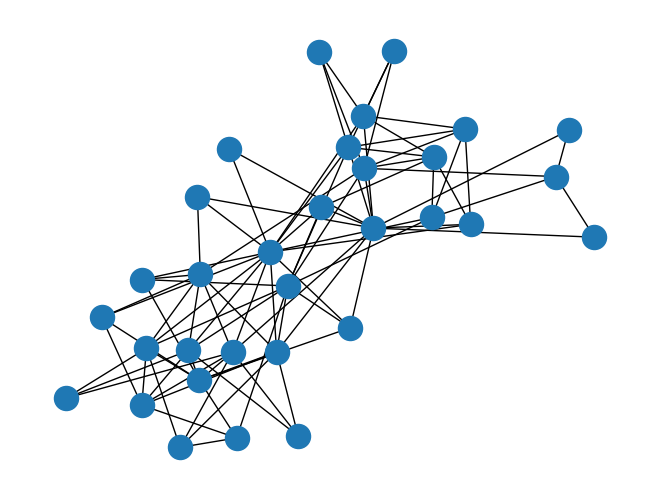

In [6]:
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")

# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")

pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw(G, pos)
plt.show()

There are two differeny kinds of nodes that exist within the **Davis Southern Women** dataset, the women and the social events they attended. So this network is a bipartite, every edge connects a woman to an event. NetworkX labels these two node types using the node attribute "bipartite", where 0 represents women and 1 represents events

In [ ]:
# Separate nodes by ttype

women = {n for  n  , d in G.nodes(data=True) if d['bipartite'] == 0}
events = set(G) - women
print("Number of women: ", len(women))
print("Number of events: ",len(events))
print("the total edge (attendance links): ", G.number_of_edges())

Number of women:  18
Number of events:  14
the total edge (attendance links):  89


In [12]:
W = bipartite.weighted_projected_graph(G, women)
print("\n# Shared events per woman (weighted degree)")

for w in sorted(women):
    print(f"{w:20} shared_events = {W.degree(w, weight='weight')}")


# Shared events per woman (weighted degree)
Brenda Rogers        shared_events = 46
Charlotte McDowd     shared_events = 24
Dorothy Murchison    shared_events = 24
Eleanor Nye          shared_events = 36
Evelyn Jefferson     shared_events = 50
Flora Price          shared_events = 14
Frances Anderson     shared_events = 32
Helen Lloyd          shared_events = 34
Katherina Rogers     shared_events = 37
Laura Mandeville     shared_events = 45
Myra Liddel          shared_events = 33
Nora Fayette         shared_events = 43
Olivia Carleton      shared_events = 14
Pearl Oglethorpe     shared_events = 31
Ruth DeSand          shared_events = 40
Sylvia Avondale      shared_events = 46
Theresa Anderson     shared_events = 57
Verne Sanderson      shared_events = 38


In [13]:
# compute simple centrality measure 
degree_centrality = nx.degree_centrality(W)
betweenness = nx.betweenness_centrality(W)
clustering = nx.clustering(W, weight="weight")

In [16]:
print(f"\n# Top 5 women by weighted degree ( most active) ")
top_degree = sorted(degree_centrality.items(), key = lambda x: x[1], reverse=True)[:5]
for w, d in top_degree:
    print(f"{w:20s} degree_centrality = {d:.3f}")


# Top 5 women by weighted degree ( most active) 
Theresa Anderson     degree_centrality = 1.000
Nora Fayette         degree_centrality = 1.000
Verne Sanderson      degree_centrality = 1.000
Helen Lloyd          degree_centrality = 1.000
Evelyn Jefferson     degree_centrality = 1.000


In [17]:
print("\n# Top 3 women by betweenness (bridges between groups)")
top_btw = sorted(betweenness.items(), key= lambda x: x[1], reverse=True)[:3]
for w, b in top_btw:
    print(f"{w:20s} betweenness={b:.3f}")


# Top 3 women by betweenness (bridges between groups)
Theresa Anderson     betweenness=0.010
Nora Fayette         betweenness=0.010
Verne Sanderson      betweenness=0.010


In [19]:
E = bipartite.weighted_projected_graph(G,events)


print("\n# Shared attendees per event (weighted degree)")
for e in sorted(events):
    print(f"{e:5s}  shared_attendees={E.degree(e, weight='weight')}")


# Shared attendees per event (weighted degree)
E1     shared_attendees=19
E10    shared_attendees=25
E11    shared_attendees=13
E12    shared_attendees=28
E13    shared_attendees=18
E14    shared_attendees=18
E2     shared_attendees=20
E3     shared_attendees=32
E4     shared_attendees=23
E5     shared_attendees=38
E6     shared_attendees=41
E7     shared_attendees=48
E8     shared_attendees=59
E9     shared_attendees=46


This graph shows the top 10 most active women based on how many events they attended with others. Each node is a woman, and each line shows shared event attendance — thicker lines mean more shared events. The dense connections show a close social circle where women like Theresa Anderson, Sylvia Avondale, and Evelyn Jefferson are central, indicating they were highly involved and linked different parts of the group.


# Top 10 women by weighted degree (most active)
Theresa Anderson     degree_centrality = 1.000
Nora Fayette         degree_centrality = 1.000
Verne Sanderson      degree_centrality = 1.000
Helen Lloyd          degree_centrality = 1.000
Evelyn Jefferson     degree_centrality = 1.000
Sylvia Avondale      degree_centrality = 1.000
Ruth DeSand          degree_centrality = 1.000
Katherina Rogers     degree_centrality = 0.941
Myra Liddel          degree_centrality = 0.941
Pearl Oglethorpe     degree_centrality = 0.941


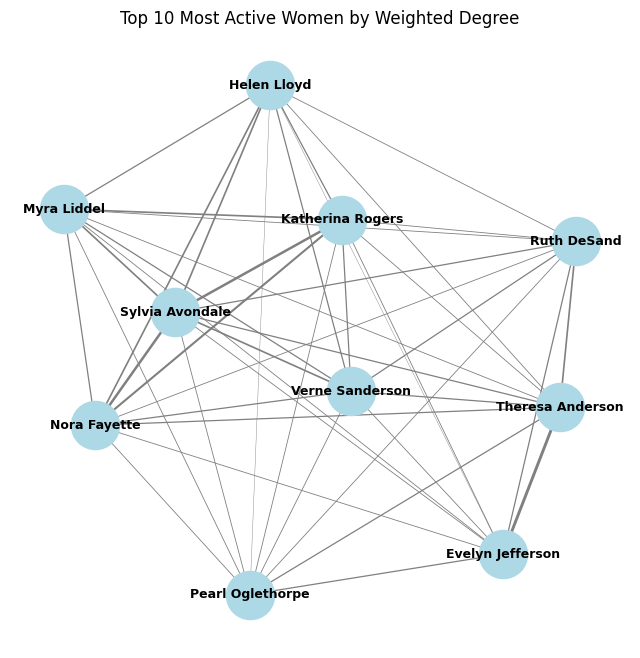

In [23]:


# Compute degree centrality (importance based on connections)
degree_centrality = nx.degree_centrality(W)

# Get top 10 most active women
top_10 = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_names = [w for w, d in top_10]

print("\n# Top 10 women by weighted degree (most active)")
for w, d in top_10:
    print(f"{w:20s} degree_centrality = {d:.3f}")

# Create a subgraph containing only the top 10 women
subW = W.subgraph(top_10_names)

# Draw the subgraph
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(subW, seed=42)
nx.draw_networkx_nodes(subW, pos, node_size=1200, node_color="lightblue")
nx.draw_networkx_labels(subW, pos, font_size=9, font_weight="bold")
nx.draw_networkx_edges(
    subW, pos,
    width=[d["weight"] * 0.3 for _, _, d in subW.edges(data=True)],
    edge_color="gray"
)

plt.title("Top 10 Most Active Women by Weighted Degree")
plt.axis("off")
plt.show()


The women-to-women projection graph shows a highly interconnected network where most women share attendance at multiple social events. The dense connections indicate that the women formed a cohesive social group with frequent overlaps in participation. Some women, such as Theresa Anderson, Evelyn Jefferson, and Sylvia Avondale, appear central within the network, suggesting they attended many events and played a key role in linking different parts of the social circle.

The event-to-event projection graph illustrates the relationships among the social events based on shared attendees. Events located close together share many of the same women, forming clusters that suggest overlapping participation. A few events, particularly E7, E8, and E9, stand out as central gatherings that connected different subsets of women. Overall, these graphs show that both the women and the events were tightly linked, reflecting a well-integrated community with strong social ties.


Detected 2 communities among women:
  Group 1: Dorothy Murchison, Flora Price, Helen Lloyd, Katherina Rogers, Myra Liddel, Nora Fayette, Olivia Carleton, Pearl Oglethorpe, Sylvia Avondale, Verne Sanderson
  Group 2: Brenda Rogers, Charlotte McDowd, Eleanor Nye, Evelyn Jefferson, Frances Anderson, Laura Mandeville, Ruth DeSand, Theresa Anderson

Detected 2 communities among events:
  Group 1: E1, E2, E3, E4, E5, E6, E7, E8
  Group 2: E10, E11, E12, E13, E14, E9


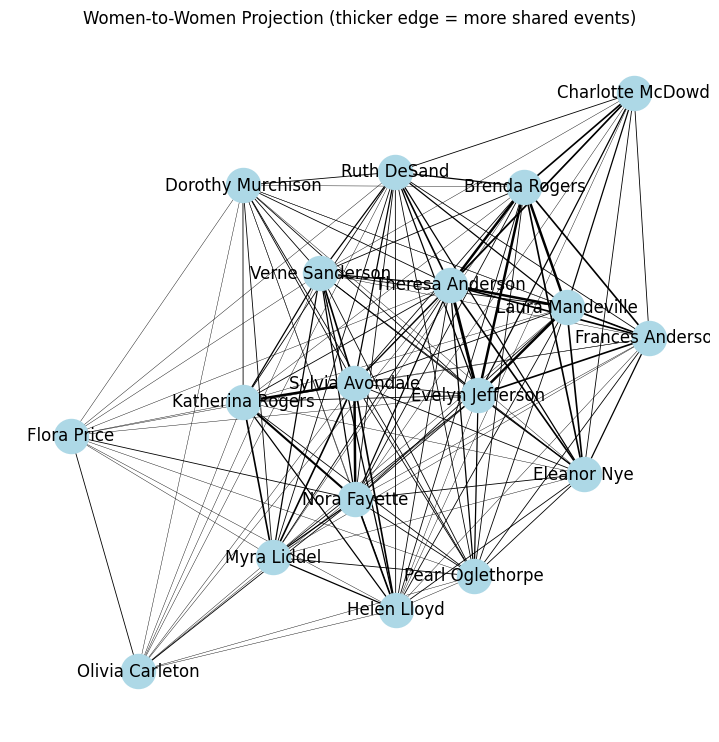

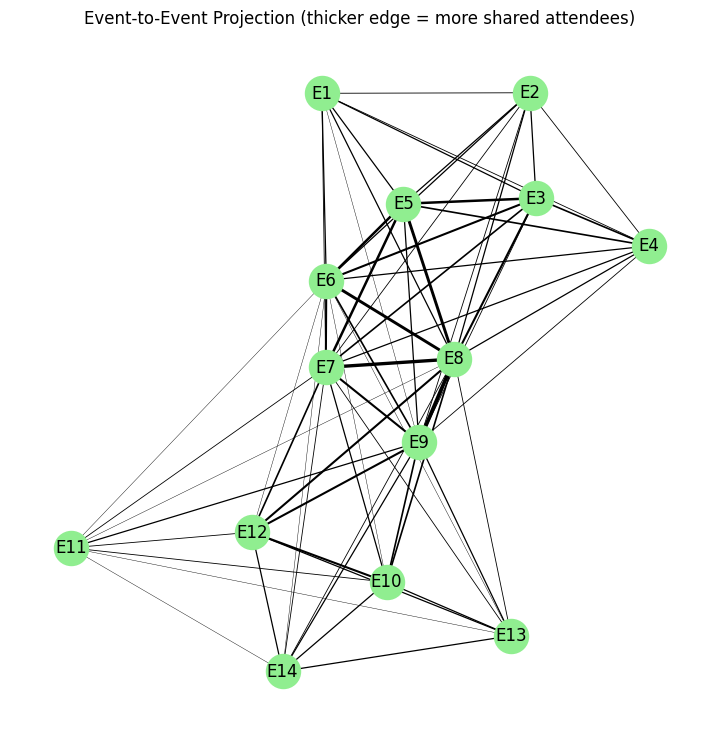

In [20]:
# Simple community detection
from networkx.algorithms.community import greedy_modularity_communities
women_comms = list(greedy_modularity_communities(W, weight="weight"))
events_comms = list(greedy_modularity_communities(E, weight="weight"))

print(f"\nDetected {len(women_comms)} communities among women:")
for i, c in enumerate(women_comms):
    print(f"  Group {i+1}: {', '.join(sorted(c))}")

print(f"\nDetected {len(events_comms)} communities among events:")
for i, c in enumerate(events_comms):
    print(f"  Group {i+1}: {', '.join(sorted(c))}")

# -----------------------------------------------------------------
# Visualize both projections
plt.figure(figsize=(7, 7))
pos_w = nx.spring_layout(W, seed=42)
nx.draw(W, pos_w, with_labels=True, node_color="lightblue", node_size=600,
        width=[d["weight"]*0.3 for *_, d in W.edges(data=True)])
plt.title("Women-to-Women Projection (thicker edge = more shared events)")
plt.show()

plt.figure(figsize=(7, 7))
pos_e = nx.spring_layout(E, seed=42)
nx.draw(E, pos_e, with_labels=True, node_color="lightgreen", node_size=600,
        width=[d["weight"]*0.3 for *_, d in E.edges(data=True)])
plt.title("Event-to-Event Projection (thicker edge = more shared attendees)")
plt.show()

The analysis of the Davis Southern Women network suggests that the women formed closely connected social groups, frequently attending the same events together. Certain women, such as Theresa Anderson, Sylvia Avondale, and Evelyn Jefferson, appeared to be central figures who participated in numerous gatherings and helped connect different groups. This pattern indicates a strong sense of community and overlapping social relationships among the participants.

In relation to the social events, the findings show that some gatherings attracted many of the same attendees, serving as important points of interaction that strengthened social connections. Overall, the network reflects a cohesive social structure in which the women’s relationships were reinforced through repeated participation in shared events.


In [2]:
!jupyter nbconvert --to pdf Assignment_Week_6.ipynb

[NbConvertApp] Converting notebook Assignment_Week_6.ipynb to pdf
[NbConvertApp] Support files will be in Assignment_Week_6_files\
[NbConvertApp] Making directory .\Assignment_Week_6_files
[NbConvertApp] Writing 47184 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | b had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 564935 bytes to Assignment_Week_6.pdf
